In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

# Define features and target
X = df.drop(columns=["cardio"])  # Features
y = df["cardio"]  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Models to Try
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Compare Models
best_model = max(results, key=results.get)
print(f"\nBest Performing Model: {best_model} with Accuracy: {results[best_model]:.4f}")


Logistic Regression Accuracy: 0.7057
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       439
           1       0.72      0.68      0.70       441

    accuracy                           0.71       880
   macro avg       0.71      0.71      0.71       880
weighted avg       0.71      0.71      0.71       880

Random Forest Accuracy: 0.6739
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       439
           1       0.67      0.70      0.68       441

    accuracy                           0.67       880
   macro avg       0.67      0.67      0.67       880
weighted avg       0.67      0.67      0.67       880

Support Vector Machine Accuracy: 0.7023
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       439
           1       0.71      0.68      0.70       441

    accuracy                           0.70       880
   macro avg       0

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define parameter grids
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

# Perform Grid Search for Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg_grid = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# Perform Grid Search for SVM
svm = SVC()
svm_grid = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Print best parameters and best scores
print(f"Best Logistic Regression Parameters: {logreg_grid.best_params_}")
print(f"Best Logistic Regression Accuracy: {logreg_grid.best_score_:.4f}")

print(f"Best SVM Parameters: {svm_grid.best_params_}")
print(f"Best SVM Accuracy: {svm_grid.best_score_:.4f}")


Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.7230
Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}
Best SVM Accuracy: 0.7338


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71       439
           1       0.71      0.68      0.70       441

    accuracy                           0.70       880
   macro avg       0.70      0.70      0.70       880
weighted avg       0.70      0.70      0.70       880



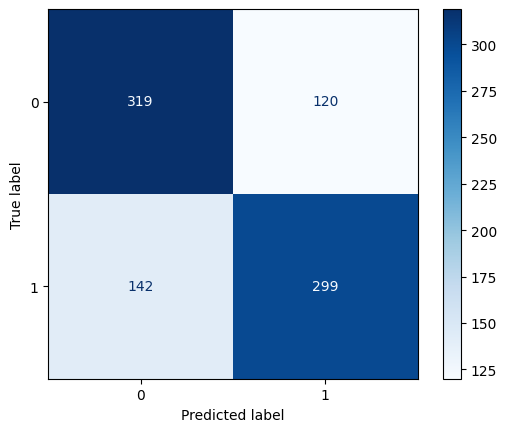

In [ ]:
# Ensure you're using the best SVM model from GridSearchCV
best_svm = svm_grid.best_estimator_

# Predict using the best SVM model
svm_y_pred = best_svm.predict(X_test)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, svm_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot(cmap='Blues')

# Classification report
from sklearn.metrics import classification_report
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))
